In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix
from sklearn import preprocessing    
le = preprocessing.LabelEncoder()

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline 

In [3]:
!pip install lightgbm
from xgboost import XGBClassifier
from xgboost import plot_tree
from xgboost import plot_importance

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier

     |████████████████████████████████| 2.0 MB 27.8 MB/s            
You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.


In [4]:
train_df = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/MachineLearning/main/dataset/Spaceship%20Titanic/train.csv')
test_df  = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/MachineLearning/main/dataset/Spaceship%20Titanic/test.csv')

In [5]:
train_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
train_df.shape

(8693, 14)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [9]:
n = train_df.nunique(axis=0)  
print("No.of.unique values in each column :\n", n)

No.of.unique values in each column :
 PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64


In [11]:
def missing_percent_of_column(train_set):
    nan_percent = train_set.isnull().sum() #100*(train_set.isnull().sum()/len(train_set))
    nan_percent = nan_percent[nan_percent>0].sort_values(ascending=False).round(1)
    DataFrame = pd.DataFrame(nan_percent)
    mis_percent_table = DataFrame.rename(columns = {0 : '% of Misiing Values'}) 
    mis_percent = mis_percent_table
    return mis_percent
miss = missing_percent_of_column(train_df)
miss

,% of Misiing Values
CryoSleep,217
ShoppingMall,208
VIP,203
HomePlanet,201
Name,200
Cabin,199
VRDeck,188
FoodCourt,183
Spa,183
Destination,182


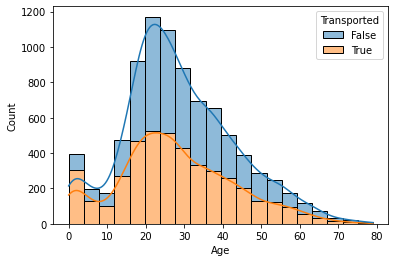

In [12]:
sns.histplot(x='Age', hue='Transported', data=train_df, bins=20, multiple="stack", kde=True)

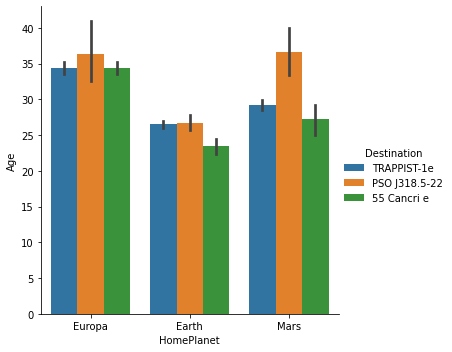

In [13]:
sns.catplot(y="Age", x="HomePlanet", hue="Destination", kind="bar", data=train_df)

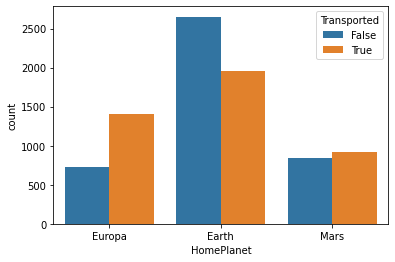

In [14]:
sns.countplot(x="HomePlanet",hue="Transported", data=train_df)

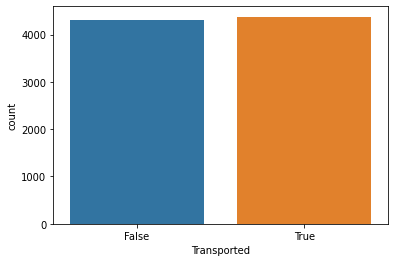

In [15]:
sns.countplot(x="Transported", data=train_df)

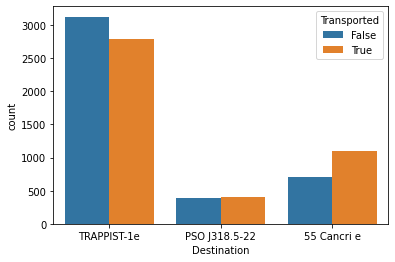

In [16]:
sns.countplot(x="Destination",hue="Transported", data=train_df)

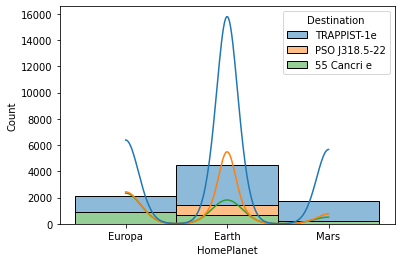

In [17]:
sns.histplot(x="HomePlanet",hue="Destination", data=train_df, multiple="stack", kde=True)

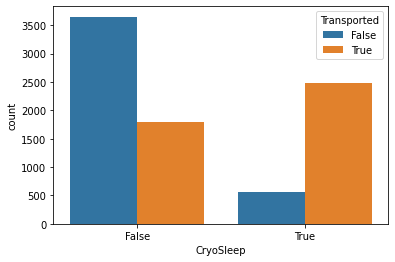

In [18]:
sns.countplot(x="CryoSleep",hue="Transported", data=train_df)

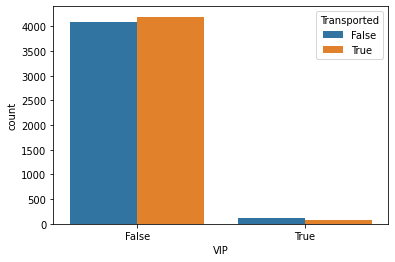

In [19]:
sns.countplot(x="VIP",hue="Transported", data=train_df)

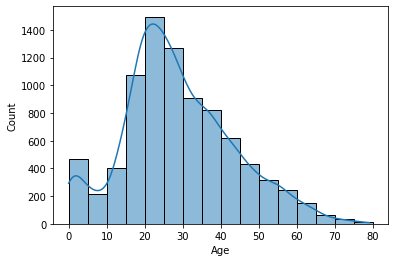

In [20]:
sns.histplot(data=train_df, x="Age", binwidth=5,multiple="stack", kde=True)

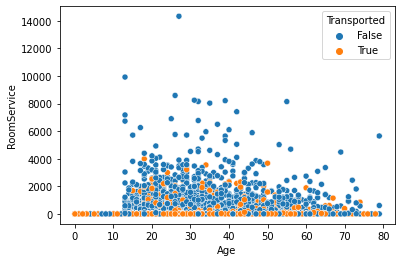

In [21]:
sns.scatterplot(data=train_df, x='Age', y='RoomService',hue="Transported",legend="full")

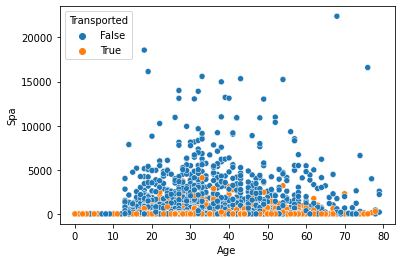

In [23]:
sns.scatterplot(data=train_df, x='Age', y='Spa',hue="Transported",legend="full")

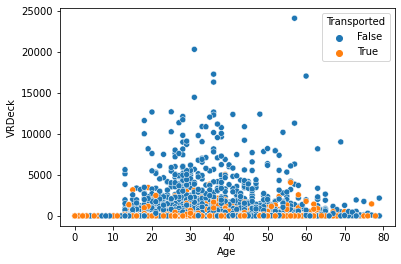

In [24]:
sns.scatterplot(data=train_df, x='Age', y='VRDeck',hue="Transported",legend="full")

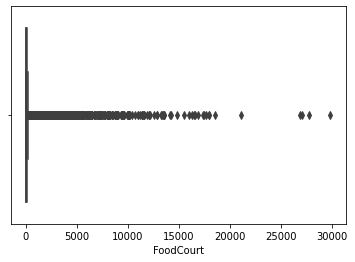

In [25]:
sns.boxplot(x='FoodCourt',data=train_df)

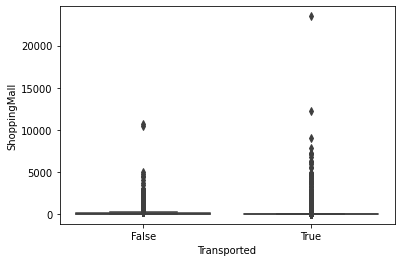

In [26]:
train_df.loc[train_df['FoodCourt'] > 20000, 'FoodCourt'] = train_df.loc[train_df['FoodCourt'] < 20000, 'FoodCourt'].mean()
sns.boxplot(x='Transported', y='ShoppingMall',data=train_df)

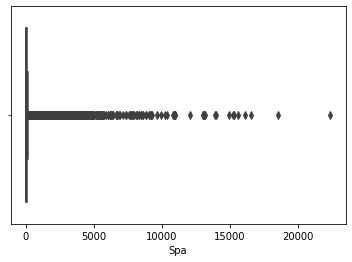

In [27]:
train_df.loc[train_df['ShoppingMall'] > 10000, 'ShoppingMall'] = train_df.loc[train_df['ShoppingMall'] < 10000, 'ShoppingMall'].mean()
sns.boxplot(x='Spa',data=train_df)

In [28]:
train_df.loc[train_df['Spa'] > 20000, 'Spa'] = train_df.loc[train_df['Spa'] < 20000, 'Spa'].mean()

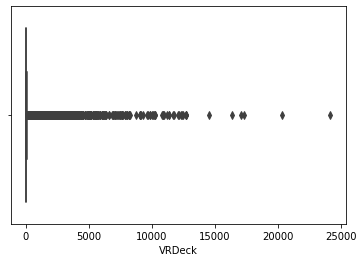

In [29]:
sns.boxplot(x='VRDeck',data=train_df)

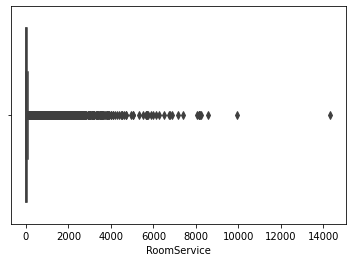

In [30]:
train_df.loc[train_df['VRDeck'] > 20000, 'VRDeck'] = train_df.loc[train_df['VRDeck'] < 20000, 'VRDeck'].mean()
sns.boxplot(x='RoomService',data=train_df)

In [31]:
train_df.loc[train_df['RoomService'] > 10000, 'RoomService'] = train_df.loc[train_df['RoomService'] < 10000, 'RoomService'].mean()

In [32]:
train_df['HomePlanet']= train_df['HomePlanet'].fillna('Earth')
test_df['HomePlanet']= test_df['HomePlanet'].fillna('Earth')
train_df['Destination']= train_df['Destination'].fillna('TRAPPIST-1e')
test_df['Destination']= test_df['Destination'].fillna('TRAPPIST-1e')

In [33]:
train_df['Destination'] = train_df['Destination'].str.replace("TRAPPIST-1e","TRAPPIST")
train_df['Destination'] = train_df['Destination'].str.replace("55 Cancri e","Cancri")
train_df['Destination'] = train_df['Destination'].str.replace("PSO J318.5-22","PSO")

test_df['Destination'] = test_df['Destination'].str.replace("TRAPPIST-1e","TRAPPIST")
test_df['Destination'] = test_df['Destination'].str.replace("55 Cancri e","Cancri")
test_df['Destination'] = test_df['Destination'].str.replace("PSO J318.5-22","PSO")
train_df['CryoSleep']= train_df['CryoSleep'].fillna(False)
test_df['CryoSleep']= test_df['CryoSleep'].fillna(False)
train_df['VIP']= train_df['VIP'].fillna(False)
test_df['VIP']= test_df['VIP'].fillna(False)
train_df['Age'].mean()

<ipython-input-33-b5f34e2fbe20>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  train_df['Destination'] = train_df['Destination'].str.replace("PSO J318.5-22","PSO")
<ipython-input-33-b5f34e2fbe20>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  test_df['Destination'] = test_df['Destination'].str.replace("PSO J318.5-22","PSO")


28.82793046746535

In [34]:
train_df['Age']= train_df['Age'].fillna(29)
test_df['Age']= test_df['Age'].fillna(29)
train_df['Spa']= train_df['Spa'].fillna(train_df['Spa'].mean())
test_df['Spa']= test_df['Spa'].fillna(test_df['Spa'].mean())
train_df['FoodCourt']= train_df['FoodCourt'].fillna(train_df['FoodCourt'].mean())
test_df['FoodCourt']= test_df['FoodCourt'].fillna(test_df['FoodCourt'].mean())
train_df['ShoppingMall']= train_df['ShoppingMall'].fillna(train_df['ShoppingMall'].mean())
test_df['ShoppingMall']= test_df['ShoppingMall'].fillna(test_df['ShoppingMall'].mean())
train_df['RoomService']= train_df['RoomService'].fillna(train_df['RoomService'].mean())
test_df['RoomService']= test_df['RoomService'].fillna(test_df['RoomService'].mean())
train_df['VRDeck']= train_df['VRDeck'].fillna(train_df['VRDeck'].mean())
test_df['VRDeck']= test_df['VRDeck'].fillna(test_df['VRDeck'].mean())
def converting_column(df,col,convertType):
    if convertType=='OHE':
        one_hot = pd.get_dummies(df[col],prefix=col)
        df = df.drop(col,axis = 1)
        df = df.join(one_hot)
        return df
    else:
        df[col] = le.fit_transform(df[col])
        return df
train_df = converting_column(train_df,'HomePlanet','OHE')
test_df = converting_column(test_df,'HomePlanet','OHE')
train_df = converting_column(train_df,'Destination','FTR')
test_df = converting_column(test_df,'Destination','FTR')
train_df = converting_column(train_df,'CryoSleep','FTR')
test_df = converting_column(test_df,'CryoSleep','FTR')
train_df = converting_column(train_df,'VIP','FTR')
test_df = converting_column(test_df,'VIP','FTR')

In [35]:
def CabinExtract(df):
    df[['Deck', 'Num', 'Side']] = df['Cabin'].str.split('/', expand=True)    
    df['Num'] = df['Num'].astype(float)
    
    df['Deck']= df['Deck'].fillna('G')
    df['Num']= df['Num'].fillna(df['Num'].mean())
    df['Side']= df['Side'].fillna('S')
    
             
    df['Deck'] = le.fit_transform(df['Deck'])
    df['Side'] = le.fit_transform(df['Side'])
    
    return df
train_df = CabinExtract(train_df)
test_df = CabinExtract(test_df)
def findFamilyId(df):
    df[['Passenger_Group_Id', 'Passenger_Num']] = df['PassengerId'].str.split('_', expand=True)
    df['Passenger_Group_Id'] = df['Passenger_Group_Id'].astype(int)
    df['Passenger_Num'] = df['Passenger_Num'].astype(int)
    df['Passenger_Cnt'] = df.groupby('Passenger_Group_Id')['Passenger_Num'].transform('max')
    return df
train_df = findFamilyId(train_df)
test_df = findFamilyId(test_df)
train_df = train_df.drop(['Cabin','Name'], axis=1)
test_df = test_df.drop(['Cabin','Name'], axis=1)
train_df = train_df.drop(['PassengerId'], axis=1)

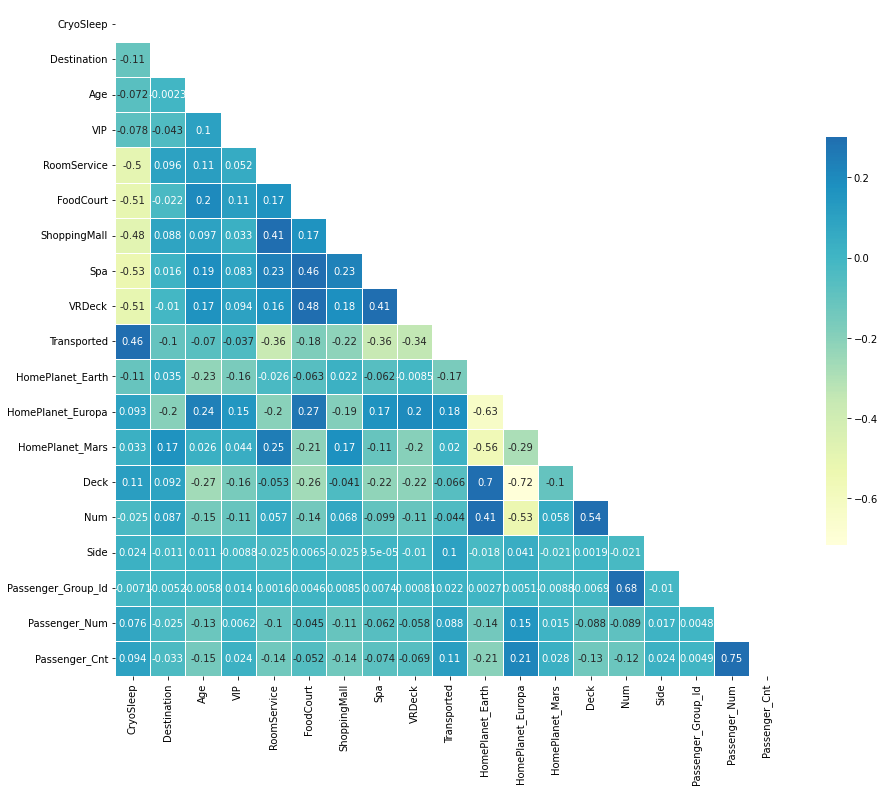

In [36]:
plt.figure(figsize=(17,17))
corr=train_df.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
g=sns.heatmap(corr, mask=mask,annot=True,cmap="YlGnBu", vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [37]:
train_df = train_df.drop(['Passenger_Num','Passenger_Group_Id','VIP','Deck','HomePlanet_Mars'], axis=1)
test_df = test_df.drop(['Passenger_Num','Passenger_Group_Id','VIP','Deck','HomePlanet_Mars'], axis=1)

In [38]:
train_df['Under15'] = train_df['Age'].apply(lambda x: 1 if x < 15 else 0)
test_df['Under15'] = test_df['Age'].apply(lambda x: 1 if x < 15 else 0)
train_df = train_df.drop(['Age'], axis=1)
test_df = test_df.drop(['Age'], axis=1)
train_df.head(5)

,CryoSleep,Destination,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,Num,Side,Passenger_Cnt,Under15
0,0,2,0.0,0.0,0.0,0.0,0.0,False,0,1,0.0,0,1,0
1,0,2,109.0,9.0,25.0,549.0,44.0,True,1,0,0.0,1,1,0
2,0,2,43.0,3576.0,0.0,6715.0,49.0,False,0,1,0.0,1,2,0
3,0,2,0.0,1283.0,371.0,3329.0,193.0,False,0,1,0.0,1,2,0
4,0,2,303.0,70.0,151.0,565.0,2.0,True,1,0,1.0,1,1,0


In [39]:
X = train_df.drop("Transported", axis=1)
y = train_df["Transported"]

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, y_train.shape,X_valid.shape, y_valid.shape , X_test.shape

((6519, 13), (6519,), (2174, 13), (2174,), (4277, 13))

In [40]:
xgb_model = XGBClassifier(n_estimators= 637,learning_rate=0.01,subsample= 0.6, min_child_weight=1, max_depth=5,objective='binary:logistic')
mod = xgb_model.fit(X_train, y_train,eval_metric='logloss')

print("Performance on train data:", mod.score(X_train, y_train))

y_pred_v = xgb_model.predict(X_valid)

cm = confusion_matrix(y_valid, y_pred_v) 
print ("Confusion Matrix : \n", cm)
rfc_single = RandomForestClassifier(bootstrap= False, n_estimators=529, max_depth=15, min_samples_split=5,min_samples_leaf=4,max_features='auto',verbose=0)
rfc_single.fit(X_train, y_train)

print("Performance on train data:", rfc_single.score(X_train, y_train))

y_pred_v = rfc_single.predict(X_valid)

cm = confusion_matrix(y_valid, y_pred_v)
 
print ("Confusion Matrix : \n", cm)

Performance on train data: 0.834790612057064
Confusion Matrix : 
 [[815 262]
 [180 917]]
Performance on train data: 0.8995244669427827
Confusion Matrix : 
 [[834 243]
 [192 905]]


/opt/python/envs/default/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [41]:
model = LGBMClassifier(n_estimators=975, min_child_samples=5, max_depth=8, learning_rate=0.01,feature_fraction=0.6, 
                       bagging_freq=5, bagging_fraction= 0.9,objective ='binary')
model.fit(X_train, y_train)

print("Performance on train data:", model.score(X_train, y_train))

y_pred_v = model.predict(X_valid)

cm = confusion_matrix(y_valid, y_pred_v) 
print ("Confusion Matrix : \n", cm)

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
Performance on train data: 0.8728332566344531
Confusion Matrix : 
 [[835 242]
 [193 904]]


In [42]:
y_pred_x = model.predict(X_test)
y_pred_x

In [43]:
PassengerId = test_df['PassengerId']
submission = pd.DataFrame({'PassengerId':PassengerId,'Transported':y_pred_x})

In [44]:
submission.to_csv('submission.csv',index=False)